In [ ]:
# limit for 2 tag
import ROOT as rt
import math
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from lib.limit_plots import *
import lib.CMS_lumi as CMS_lumi
import lib.tdrstyle as tdrstyle
tdrstyle.setTDRStyle()

print(sys.version)

Welcome to JupyROOT 6.24/06
3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:45:29) 
[GCC 10.4.0]


# Load ntuples

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees_obs =OrderedDict()
dataCards_obs = OrderedDict()

decay = 'PiPlusPiMinus'

samples = [
    'SigPiPlusPiMinus_M0p3',
    # 'SigPiPlusPiMinus_M0p5',
    'SigPiPlusPiMinus_M1p0',
    'SigPiPlusPiMinus_M2p0',
    'SigPiPlusPiMinus_M3p0',
]

unblind = 'unBlinded'
category = 'csc'

base = f"/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_{unblind}_lepIDSF_IT"
limitDir = f'{base}/'
dataCardDir = f'{base}/'

lumi = 137000
nCsc = 100
nDt = 80

ctaus = np.array([3,5,10,30,50,70,100,300,500,700,1000,3000,5000,10000])

# if decay == 'bbbb': mass = np.array([ 15, 40, 55])
# else:mass = np.array([ 7, 15, 40, 55])

# mass = ['0p3', '0p5', '1p0', '2p0', '3p0']
# expected = ['0.025', '0.160','0.500','0.840','0.975']

for m in samples:
    limitTrees[m] = {}
    dataCards[m] = {}
    for ct in ctaus:
        ct_str = str(ct).replace('.','p')
        if ct == int(ct):ct_str = str(int(ct)).replace('.','p')
        else: ct_str      = str(ct).replace('.','p')
        dataCardLocation  = dataCardDir + '/'+m+'_high_ctau'+ct_str+'/'+ category.upper() + '/card.txt'
        print(dataCardLocation)
        limitTreeLocation =    limitDir + '/'+m+'_high_ctau'+ct_str+'/'+ category.upper() + '/higgsCombineTest.AsymptoticLimits.mH120.root'
        dataCards[m][ct]  = dataCardLocation
        limitTrees[m][ct] = limitTreeLocation
print(len(limitTrees))
norms = []
limits = {}
for i,m in enumerate(limitTrees.keys()):

    # if unblind == 'blind' or unblind == 'unblind': limits[m] = np.ones((len(ctaus), 5))*1000000
    # else:limits[m] = np.ones((len(ctaus), 6))*1000000
    
    limits[m] = np.ones((len(ctaus), 6))*1000000
    
    for j, k in enumerate(limitTrees[m].keys()):      
        line = open(dataCards[m][k], "r").readline()
        # if not line.split(" ")[0] == '#': continue
        # signal_norm = float(line.split(" ")[3])
        # print(signal_norm)
        # if signal_norm == 0: continue
        # line = float(line)
        line = float(line.split("#SF: ")[1]) # 1.88423E-06 

        if len(uproot.open(limitTrees[m][k]).keys()) == 2:
            T = uproot.open(limitTrees[m][k])['limit']['limit'].array()
            if len(np.array(T))==6: limits[m][j] = np.array(T)*line
    limits[m] = np.array(limits[m])
    # print(limits[m])


print(ctaus)
# print(norms)
# print(limits)


/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau3/CSC/card.txt
/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau5/CSC/card.txt
/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau10/CSC/card.txt
/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau30/CSC/card.txt
/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau50/CSC/card.txt
/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau70/C

FileNotFoundError: [Errno 2] No such file or directory: '/uscms/home/ddiaz/nobackup/BParkingLLPs/CMSSW_9_4_4/src/Stats/CMSSW_10_2_13/src/ABCD/Lim_WP23_GJson_unBlinded_lepIDSF_IT//SigPiPlusPiMinus_M0p3_high_ctau3/CSC/card.txt'

# Expected Limit only (blinded)

/uscms_data/d3/ahayrape/mamba/envs/btollpk/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h2(
/uscms_data/d3/ahayrape/mamba/envs/btollpk/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

6724
0
0.3043800890445709 13.665416678574235
0.31326813995838165 13.965007490953772
0.3224157243967056 14.256256366770469
0.3318304419517517 14.539395582525273
0.3415200710296631 14.814650947111518
0.35149262845516205 15.082241981901664
0.35177235027279413 15.089529037475586
0.3617563992738724 15.412498932683931
0.37231987714767456 15.735524520047067
0.3831918090581894 16.04955564280514
0.39438121020793915 16.354842746732984
0.4058973491191864 16.651629304084697
0.40738801199003427 16.68882179260254
0.4177497625350952 17.00984662630851
0.42994828522205353 17.368116002007806
0.4425030052661896 17.716409569768423
0.45542432367801666 18.055005100314823
0.46872295439243317 18.384172630002823
0.4717965227858712 18.457618713378906
0.48240990936756134 18.77254539426478
0.4964965283870697 19.169903858359255
0.5109944939613342 19.55619810097827
0.525915801525116 19.931736199104996
0.5412728190422058 20.296817651493424
0.5463879945862425 20.41388511657715
0.5570782721042633 20.71768979680491
0.5

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.C has been generated
Info in <TCanvas::Print>: pdf file /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.pdf has been created


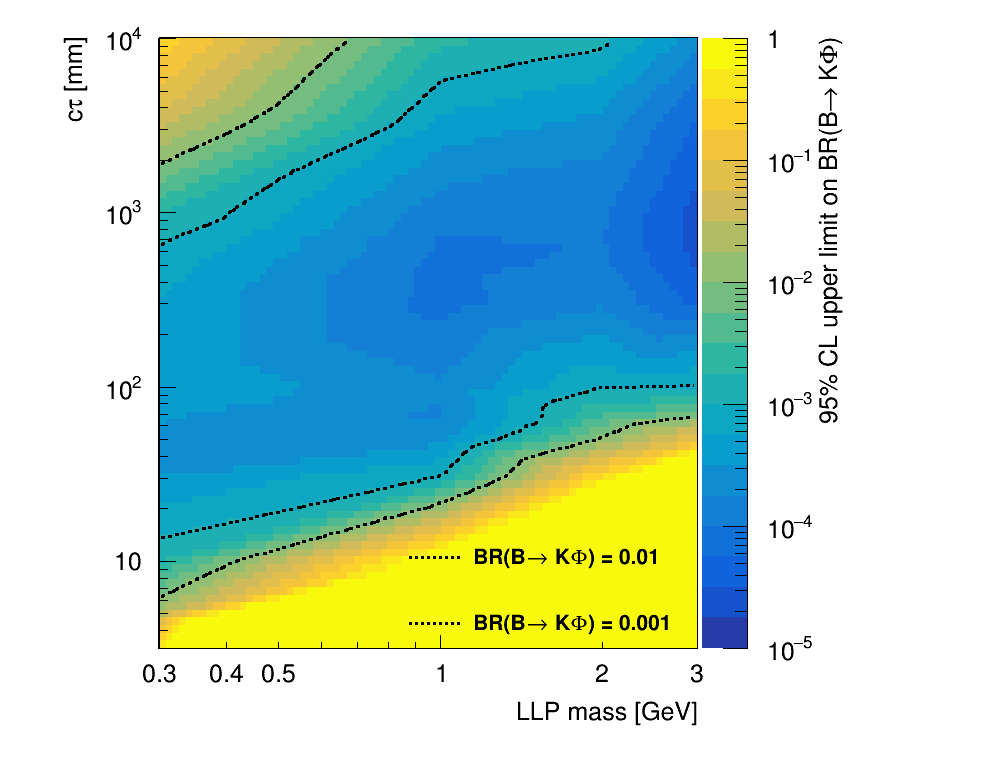

In [16]:
import os
import importlib
importlib.reload(sys.modules['lib.CMS_lumi'])

decays =['PiPlusPiMinus']

opac_1sig = 0.25
opac_2sig = 0.1

for decay in decays:
    # leg = rt.TLegend(0.2,0.15,0.5,0.32)
    leg = rt.TLegend(0.4,0.15,0.7,0.32)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [100,0,30,300,-4,1])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('_M')+2:].replace('p','.')))
            sample_temp.append(m)
            # print(m_sample)
    
    max_mass = 3 
    min_mass = 0.3 

#     if decay == 'Pi0Pi0': min_mass = 0.3
#     elif decay == 'PiPlusPiMinus': min_mass = 0.3

    # h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [cm]','95% CL upper limit on BR(B#rightarrow LLP K)'], \
    #                 binning = [200,math.log10(min_mass),math.log10(max_mass),200,0.5,4])

    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [mm]','95% CL upper limit on BR(B#rightarrow K#Phi)'], \
                    binning = [80,math.log10(min_mass),math.log10(max_mass),80,0.5,4])
                    # binning = [80,math.log10(0.1),math.log10(10),80,0.5,4])

    # for logm in np.arange(-3,2,0.1):
    #     m = 10.0**float(logm)
    for m in m_sample:
        m = float(m)
        use_m_s = 0.0
        if m > np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index   = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] > 0 # < 10000

        # if decay == 'Pi0Pi0'       : cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        # if decay == 'PiPlusPiMinus': cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j] == 0.0:continue
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j])), limits[sample_temp[index]][:,2][cond][j])

    print(len(np.array(list(h))))
    h = interpolate2D(x,y,z, h, 0.2, 1.0)
    
    tdrstyle.setTDRStyle()
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
    hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h = log_scale_conversion(h)
    # plt.hist(h, bins = 100)
    # plt.show()
    h.SetMinimum(1e-5)
    h.SetMaximum(1.0)
    h.GetXaxis().SetMoreLogLabels()
    h.GetXaxis().SetNoExponent()
    h.GetXaxis().SetTitleSize(0.035)
    h.GetYaxis().SetTitleSize(0.035)
    h.GetZaxis().SetTitleSize(0.035)
    h.GetXaxis().SetLabelSize(0.035)
    h.GetYaxis().SetLabelSize(0.035)
    h.GetZaxis().SetLabelSize(0.035)
    h.GetXaxis().SetTitleOffset(1.5)
    h.GetYaxis().SetTitleOffset(1.5)
    h.GetZaxis().SetTitleOffset(1.5)
    h.Draw('colz')
    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        print(i)
        contour0 = conts.At(i)
        curv = contour0.First()
        for i in range(contour0.GetSize()):
            for j in range(contour0[i].GetN()):
                print(contour0[i].GetPointX(j), contour0[i].GetPointY(j))
            print()
        finalcurv = rt.TGraph(1)
        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])
            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            # print(maxN)
            print(contour0.GetSize())
            print()
            for j in range(1, contour0.GetSize()):
                print(j)
                curv = contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.SetLineStyle(std_color_list[i])
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(B#rightarrow K#Phi) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')

    latex = rt.TLatex()
    latex.SetTextSize(0.05)
    latex.SetTextFont(42)

    # if decay   == 'Pi0Pi0'       : latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{0}#pi^{0}")
    # elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{+}#pi^{-}")
    
    leg.Draw()
    
    c.SetRightMargin(0.3)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    c.Draw()
    
    output_dir = os.getcwd()
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir + decay

    c.SaveAs(name+'_2d_expected.png')
    c.SaveAs(name+'_2d_expected.C')
    c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()

/uscms_data/d3/ahayrape/mamba/envs/btollpk/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h2(
/uscms_data/d3/ahayrape/mamba/envs/btollpk/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

6724
0
42

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
1
23

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.C has been generated
Info in <TCanvas::Print>: pdf file /uscms_data/d3/ahayrape/BToPhiK_AnalysisPiPlusPiMinus_2d_expected.pdf has been created


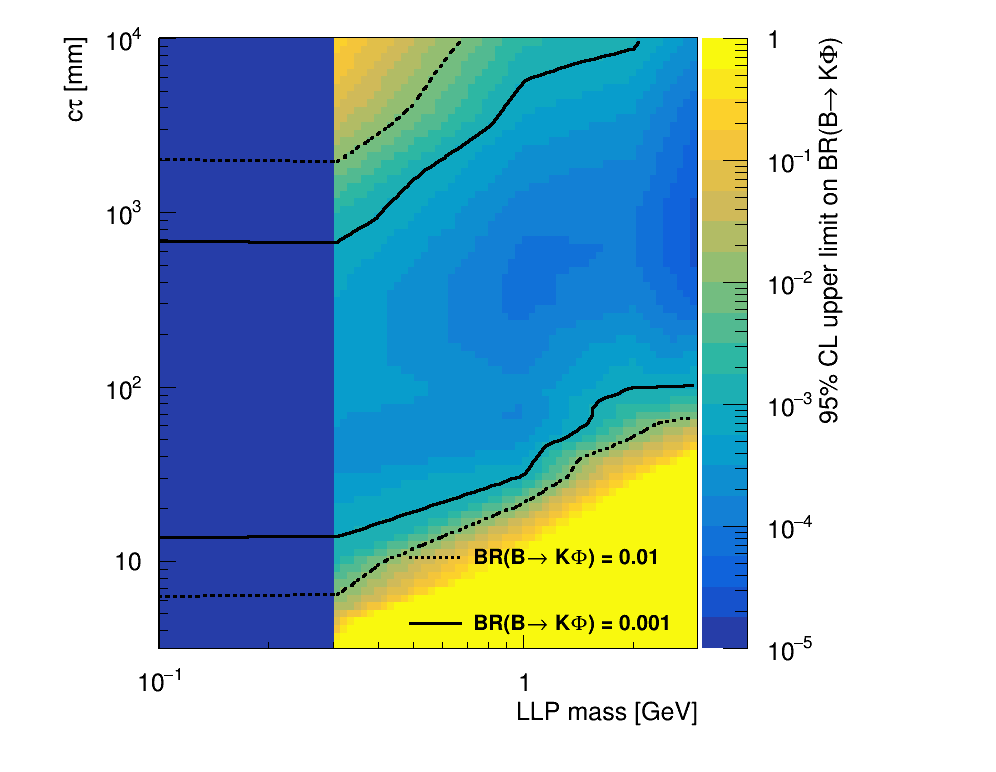

In [4]:
import os
import importlib
importlib.reload(sys.modules['lib.CMS_lumi'])

decays =['PiPlusPiMinus']

opac_1sig = 0.25
opac_2sig = 0.1

for decay in decays:
    # leg = rt.TLegend(0.2,0.15,0.5,0.32)
    leg = rt.TLegend(0.4,0.15,0.7,0.32)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [300,0,30,100,-4,1])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('_M')+2:].replace('p','.')))
            sample_temp.append(m)
            # print(m_sample)
    
    max_mass = 3 
    min_mass = 0.3 

#     if decay == 'Pi0Pi0': min_mass = 0.3
#     elif decay == 'PiPlusPiMinus': min_mass = 0.3

    # h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [cm]','95% CL upper limit on BR(B#rightarrow LLP K)'], \
    #                 binning = [200,math.log10(min_mass),math.log10(max_mass),200,0.5,4])

    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [mm]','95% CL upper limit on BR(B#rightarrow K#Phi)'], \
                    binning = [80,math.log10(0.1),math.log10(max_mass),80,0.5,4])
                    # binning = [80,math.log10(0.1),math.log10(10),80,0.5,4])

    # for logm in np.arange(-3,2,0.1):
    #     m = 10.0**float(logm)
    for m in m_sample:
        m = float(m)
        use_m_s = 0.0
        if m > np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index   = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] > 0 # < 10000

        # if decay == 'Pi0Pi0'       : cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        # if decay == 'PiPlusPiMinus': cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j] == 0.0:continue
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j])), limits[sample_temp[index]][:,2][cond][j])

    print(len(np.array(list(h))))
    h = interpolate2D(x,y,z, h, 0.2, 1.0)
    
    tdrstyle.setTDRStyle()
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
    hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h = log_scale_conversion(h)
    # plt.hist(h, bins = 100)
    # plt.show()
    h.SetMinimum(1e-5)
    h.SetMaximum(1.0)
    h.GetXaxis().SetTitleSize(0.035)
    h.GetYaxis().SetTitleSize(0.035)
    h.GetZaxis().SetTitleSize(0.035)
    h.GetXaxis().SetLabelSize(0.035)
    h.GetYaxis().SetLabelSize(0.035)
    h.GetZaxis().SetLabelSize(0.035)
    h.GetXaxis().SetTitleOffset(1.5)
    h.GetYaxis().SetTitleOffset(1.5)
    h.GetZaxis().SetTitleOffset(1.5)
    h.Draw('colz')
    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        print(i)
        contour0 = conts.At(i)
        curv = contour0.First()
        finalcurv = rt.TGraph(1)
        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])
            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            # print(maxN)
            print(contour0.GetSize())
            print()
            for j in range(1, contour0.GetSize()):
                print(j)
                curv =  contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.SetLineStyle(std_color_list[i])
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(B#rightarrow K#Phi) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')

    latex = rt.TLatex()
    latex.SetTextSize(0.05)
    latex.SetTextFont(42)

    # if decay   == 'Pi0Pi0'       : latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{0}#pi^{0}")
    # elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{+}#pi^{-}")
    
    leg.Draw()
    
    c.SetRightMargin(0.3)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    c.Draw()
    
    output_dir = os.getcwd()
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir + decay

    c.SaveAs(name+'_2d_expected.png')
    c.SaveAs(name+'_2d_expected.C')
    c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()

<h1>Make 1D plots</h1>

In [5]:
samples

['SigPiPlusPiMinus_M0p3',
 'SigPiPlusPiMinus_M1p0',
 'SigPiPlusPiMinus_M2p0',
 'SigPiPlusPiMinus_M3p0']

In [6]:
decayse

NameError: name 'decayse' is not defined

In [ ]:
import os
import importlib
importlib.reload(sys.modules['lib.CMS_lumi'])

decays =['PiPlusPiMinus']
samples = ['SigPiPlusPiMinus_M0p3']
m_sample = [0.3]
opac_1sig = 0.25
opac_2sig = 0.1

for decay in decays:
    # leg = rt.TLegend(0.2,0.15,0.5,0.32)
    leg = rt.TLegend(0.4,0.15,0.7,0.32)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [300,0,30,100,-4,1])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('_M')+2:].replace('p','.')))
            sample_temp.append(m)
            # print(m_sample)
    
    max_mass = 3 
    min_mass = 0.3 

#     if decay == 'Pi0Pi0': min_mass = 0.3
#     elif decay == 'PiPlusPiMinus': min_mass = 0.3

    # h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [cm]','95% CL upper limit on BR(B#rightarrow LLP K)'], \
    #                 binning = [200,math.log10(min_mass),math.log10(max_mass),200,0.5,4])

    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [mm]','95% CL upper limit on BR(B#rightarrow K#Phi)'], \
                    binning = [80,math.log10(min_mass),math.log10(max_mass),80,0.5,4])

    # for logm in np.arange(-3,2,0.1):
    #     m = 10.0**float(logm)
    for m in [0.3]:
        m = float(m)
        use_m_s = 0.0
        if m > np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index   = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] > 0 # < 10000

        # if decay == 'Pi0Pi0'       : cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        # if decay == 'PiPlusPiMinus': cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j] == 0.0:continue
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j])), limits[sample_temp[index]][:,2][cond][j])

    print(len(np.array(list(h))))
    # h = interpolate2D(x,y,z, h, 0.2, 1.0)
    
    tdrstyle.setTDRStyle()
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
    hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h = log_scale_conversion(h)
    # plt.hist(h, bins = 100)
    # plt.show()
    h.SetMinimum(1e-5)
    h.SetMaximum(1.0)
    h.GetXaxis().SetTitleSize(0.035)
    h.GetYaxis().SetTitleSize(0.035)
    h.GetZaxis().SetTitleSize(0.035)
    h.GetXaxis().SetLabelSize(0.035)
    h.GetYaxis().SetLabelSize(0.035)
    h.GetZaxis().SetLabelSize(0.035)
    h.GetXaxis().SetTitleOffset(1.5)
    h.GetYaxis().SetTitleOffset(1.5)
    h.GetZaxis().SetTitleOffset(1.5)
    h.Draw('colz')
    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        print(i)
        contour0 = conts.At(i)
        curv = contour0.First()
        finalcurv = rt.TGraph(1)
        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])
            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            # print(maxN)
            print(contour0.GetSize())
            print()
            for j in range(1, contour0.GetSize()):
                print(j)
                curv =  contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.SetLineStyle(std_color_list[i])
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(B#rightarrow K#Phi) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')

    latex = rt.TLatex()
    latex.SetTextSize(0.05)
    latex.SetTextFont(42)

    # if decay   == 'Pi0Pi0'       : latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{0}#pi^{0}")
    # elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "LLP #rightarrow #pi^{+}#pi^{-}")
    
    leg.Draw()
    
    c.SetRightMargin(0.3)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    c.Draw()
    
    output_dir = os.getcwd()
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir + decay

    c.SaveAs(name+'_2d_expected.png')
    c.SaveAs(name+'_2d_expected.C')
    c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()

# scale limit by BR

In [ ]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']
pid = [11, 22,321,311,111,211,1,15,5]
mass = {}
mass_string = {}
for d in decays:
    mass[d] = []
    mass_string[d] = []
    for s in samples:
        if d in s:
            mass[d].append(float(s[s.find('ms')+2:].replace('p','.')))
            mass_string[d].append(s[s.find('ms')+2:])
print(mass)
print(mass_string)
opac_1sig = 0.25
opac_2sig = 0.1

leg = rt.TLegend(0.2,0.15,0.5,0.32)

leg.SetFillStyle(0)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
rt.gStyle.SetLegendFillColor(1)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 1000, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000

sample_temp = []
m_sample = []
x = array('d',[])
y = array('d',[])
z = array('d',[])
x_low = array('d',[])
y_low = array('d',[])
z_low = array('d',[])
max_mass = 20    
min_mass = 0.01

h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                binning = [100,math.log10(min_mass),math.log10(max_mass),80,-1,3])

br_path = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/branchingRatio_phi/'
# import required module
h_mass = {}
for filename in os.listdir(br_path): # loop over mass points from 0.1 to 40 GeV
    f = os.path.join(br_path, filename)
    if os.path.isfile(f) and '.txt' in filename and filename[:3] == 'phi':
        m = float(filename[4:-4].replace('dot', '.'))
#         if not round(m,1) == m and m > 1.0:
#             print(m)
#             continue
#         if m >40 and m <55:continue
        if m == 0:continue
        if m <= 0.2:continue # use just EE for below 0.2
            
        
        br = []
        decay = []
        total_limits = np.array([])
        with open(f) as fi:
            lines = fi.readlines()
            for i_line,line in enumerate(lines): #loop over all decays
                if not '9000006:addChannel' in line:continue
                br_line = line[line.find('=')+2:].split(" ")
#                 print(i_line,line)
                assert(abs(float(br_line[3])) == abs(float(br_line[4])))
                if abs(float(br_line[3])) == 13:continue
                if abs(float(br_line[3])) == 3 or abs(float(br_line[3])) == 4 or abs(float(br_line[3])) == 21:
                    decay.append(1)
                else:decay.append(abs(float(br_line[3])))
                br.append(float(br_line[1]))
                if decay[-1] not in pid:print('PARTICLE NOT FOUND', br_line[3])
        
                # find which mass to use
                use_m_s = 0.0
                list_of_m = mass[decays[pid.index(decay[-1])]]
                if m>np.max(list_of_m): 
                    use_m_s = np.max(list_of_m)
                    index = np.argmax(list_of_m)
                else:
                    for i, m_s in enumerate(list_of_m):
                        if m <= m_s:
                            use_m_s = m_s
                            index = i
                            break
                # find sample corresponding to the mass and decay mode
                sample_name = 'allProd_withggZH_HToSS_STo'+decays[pid.index(decay[-1])]+'_ms'+mass_string[decays[pid.index(decay[-1])]][index]
                assert(sample_name in samples)
                print(sample_name, mass_string[decays[pid.index(decay[-1])]][index], use_m_s)
#                 if 'Pi0' in sample_name and '0p4' in sample_name:print(m)
                if len(total_limits) == 0:
                    x += array('d', [math.log10(float(m))]*len(ctaus_m))
                    y += array('d', np.log10(ctaus_m/use_m_s*m))
                    total_limits = 1./limits[sample_name][:,2]*br[-1]
                else:
                    total_limits += 1./limits[sample_name][:,2]*br[-1]
                
#             if np.min(1./total_limits)<0.001: print(m,np.min(1./total_limits))
            total_limits = np.log10(1./total_limits)
#             total_limits = 1./total_limits

            for j in range(len(ctaus_m)):
#                     if 'Pi0' in sample_name and '0p4' in sample_name:print(ctaus_m[j], ctaus_m[j]/use_m_s*m, h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)))
                    h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)),\
                                    10**(total_limits[j]))
#                     print(10**(total_limits[j]))
            z += array('d', list(total_limits))
        
        
        
for logm in np.arange(-2,math.log10(0.2),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))            
    cond = np.logical_and(cond, ctaus_m > 0.002)

    
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),limits[sample_name][:,2][cond][j])

for logm in np.arange(math.log10(0.2),math.log10(0.3),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
#     2--> 0.4
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))       
    cond = np.logical_and(cond, ctaus_m > 0.002)
#     print(ctaus_m[cond])
#     print(limits[sample_name][:,2][cond])
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]/0.001))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),1000*limits[sample_name][:,2][cond][j])

        
print(limits[sample_name][:,2][cond])

print(len(x), len(y), len(z))

# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'linear', norm = 'seuclidean')
x = array('d', [])
y = array('d', [])
z = array('d', [])
for i in range(1, h.GetNbinsX()+1):
    for j in range(1, h.GetNbinsY()+1):
        if not math.isnan(h.GetBinContent(i,j)) and not h.GetBinContent(i,j) == 0:
            x.append(h.GetXaxis().GetBinCenter(i))
            y.append(h.GetYaxis().GetBinCenter(j))
            z.append(math.log10(h.GetBinContent(i,j)))


# # h = interpolate2D(x,y,z, h, 0.02,0.5, inter = 'rbf', norm = 'seuclidean')
# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'seuclidean')

# 
# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'euclidean')

tdrstyle.setTDRStyle()




# #############
# # plot contour
# #############

contours = array('d',[ 0.001, 0.01])
hframed = frameTH2D(h)
hframed = log_scale_conversion(hframed)
hframed.SetContour(len(contours),contours)
hframed.SetMaximum(1)
hframed.SetMinimum(0.0005)
hframed.Draw("CONT Z LIST")

rt.gPad.Update()

h = log_scale_conversion(h)
h.SetMinimum(1e-4)
h.SetMaximum(1) 
h.Draw('colz')

conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
cont_gr = []
print(conts.GetSize())
for i in range(conts.GetSize()):
#     cont_gr[i] = []
    contour0 = conts.At(i)
    curv = contour0.First()
    finalcurv = rt.TGraph(1)
    print(contour0.GetSize())
    try:
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        finalcurv = curv.Clone()
        maxN = curv.GetN()
    except AttributeError:
        print ("ERROR: no curve drawn for contour %s "%(i))
    for j in range(1, contour0.GetSize()):
        curv = contour0.After(curv)
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        if curv.GetN()>maxN:
            maxN = curv.GetN()
            finalcurv = curv.Clone()
    cont_gr.append(finalcurv)
print(len(cont_gr))
for i in range(len(cont_gr)):
    leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[i]), 'L')


leg.Draw()

c.SetRightMargin(0.2)

c.SetLogz()
c.SetLogx()
c.SetLogy()



c.Draw()


# output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
# if not os.path.isdir(output_dir):os.makedirs(output_dir)
# name = output_dir+mode+'_HToSSTo'+decay


# #     print(name)
# c.SaveAs(name+'_2d_expected.png')
# c.SaveAs(name+'_2d_expected.C')
# c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()
